# Global mean Sea Surface Temperatures

Create the following data files in netcdf format

**sstd** - SST monthly mean (time: 492,lat: 720,lon: 1440)

**sstd_WGlobalmean** - SST weighted global mean (time)

**sstd_Clim** - monthly climatology (month: 12lat: 720lon: 1440)

**sstd_anom** - anomaly from monthly Climatology (time: 492, lat: 720,lon: 1440)

**sstd_anom_WGlobalmean** - SST anomlay weighted global mean (time: 492)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter

plt.rcParams['figure.figsize'] = (10, 4)

#### Settings

In [2]:
#To compute de climatoloy
year1='1982'
year2='1992'

## Load data

In [3]:
base_file = '/data/shareddata/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
files = [f'{base_file}.{year}.nc' for year in range(1982, 2024)]
sst = xr.open_mfdataset(files)
sstd = sst.sst

## Global mean
(weigthed and unweigthed)

In [4]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sstd.lat))
weights.name = "weights"
sstd_weighted = sstd.weighted(weights)
sstd_WGlobalmean = sstd_weighted.mean(("lon", "lat"),skipna=True).load()

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [5]:
#Create monthly climatology
sstd_Clim = sstd.sel(time=slice(year1,year2)).groupby('time.dayofyear').mean(dim='time').load();

In [6]:
#Create anomaly
sstd_anom = sstd.groupby('time.dayofyear') - sstd_Clim

## Global mean anomaly

In [7]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sstd.lat))
weights.name = "weights"
sstd_anom_weighted = sstd_anom.weighted(weights)
sstd_anom_WGlobalmean = sstd_anom_weighted.mean(("lon", "lat"),skipna=True).load()
sstd_anom_WGlobalmean_rolling = sstd_anom_WGlobalmean.rolling(time=12,center=True).mean()

In [8]:
sstd_WGlobalmean_Y = sstd_WGlobalmean.resample(time='1Y').mean(dim='time',skipna=True)
sstd_anom_WGlobalmean_Y = sstd_anom_WGlobalmean.resample(time='1Y').mean(dim='time',skipna=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Mean global Sea Surface Temperature')

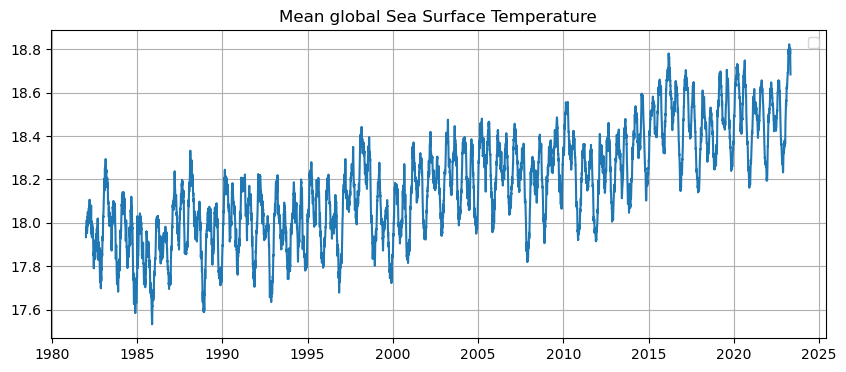

In [9]:
fig, ax = plt.subplots(1, 1 , figsize=(10,4))
ax.plot(sstd_WGlobalmean.time,sstd_WGlobalmean)
#ax.plot(sstd_WGlobalmean_Y.time,sstd_WGlobalmean_Y,'-b')
ax.grid()
ax.legend()
ax.set_title('Mean global Sea Surface Temperature')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


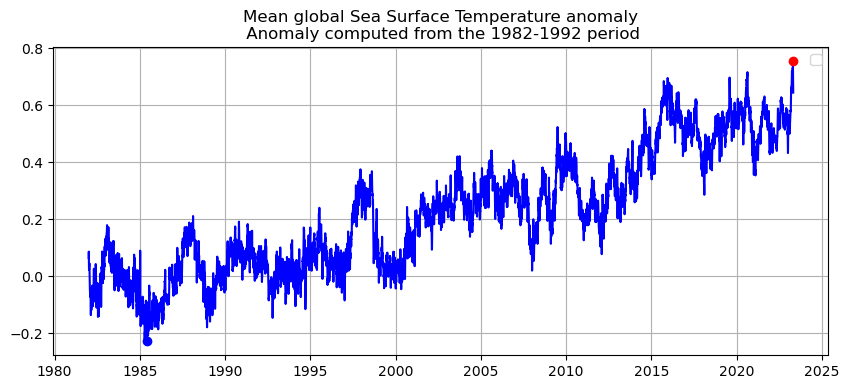

In [10]:
fig, ax = plt.subplots(1, 1 , figsize=(10,4))
ax.plot(sstd_anom_WGlobalmean.time        ,sstd_anom_WGlobalmean,'b')
#ax.plot(sstd_anom_WGlobalmean_Y.time      ,sstd_anom_WGlobalmean_Y,'-b')
#ax.plot(sstd_anom_WGlobalmean_rolling.time,sstd_anom_WGlobalmean_rolling,'r')

ax.plot(sstd_anom_WGlobalmean.time.isel(sstd_anom_WGlobalmean.argmax(...)),
        sstd_anom_WGlobalmean.isel(sstd_anom_WGlobalmean.argmax(...)),'ro')
ax.plot(sstd_anom_WGlobalmean.time.isel(sstd_anom_WGlobalmean.argmin(...)),
        sstd_anom_WGlobalmean.isel(sstd_anom_WGlobalmean.argmin(...)),'bo')

ax.grid()
ax.legend()
ax.set_title('Mean global Sea Surface Temperature anomaly\n Anomaly computed from the 1982-1992 period');

In [11]:
sstd_anom_WGlobalmean

<xarray.DataArray 'sst' (time: 15095)>
array([0.06286856, 0.08492837, 0.08534459, ..., 0.6807059 , 0.66503197,
       0.6427777 ], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2023-04-30
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 113 114 115 116 117 118 119 120

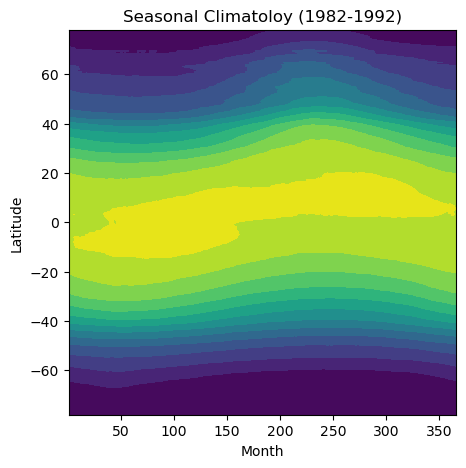

In [12]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(sstd_Clim.mean(dim='lon').dayofyear,
                 sstd_Clim.mean(dim='lon').lat,
                 sstd_Clim.mean(dim='lon').transpose(),levels=12, vmin=-2, vmax=30)
ax.set_ylim(-78,78)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + year1 + '-' + year2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

In [15]:
#sstd.to_netcdf('noaa.oisst.v2.highres.sstd.nc')
#sstd_Clim.to_netcdf('noaa.oisst.v2.highres.sstdC.nc')
#sstd_anom.to_netcdf('noaa.oisst.v2.highres.sstdA.nc')

In [16]:
sstd_WGlobalmean.to_netcdf('sstd_WGlobalmean.nc')
sstd_anom_WGlobalmean.to_netcdf('sstd_anom_WGlobalmean.nc')

### Canary Islands daily data

In [17]:
sstd_NorteTenerife = sstd.sel(lon=360-16.1188,lat=28.5559,method='nearest').load()
sstd_anom_NorteTenerife = sstd_anom.sel(lon=360-16.1188,lat=28.5559,method='nearest').load()

In [18]:
sstd_anom_NorteTenerife_rolling = sstd_anom_NorteTenerife.rolling(time=12,center=True).mean()
sstd_NorteTenerife_Y = sstd_NorteTenerife.resample(time='1Y').mean(dim='time',skipna=True)

In [19]:
sstd_NorteTenerife.to_netcdf('sstd_NorteTenerife.nc')
sstd_anom_NorteTenerife.to_netcdf('sstd_anom_NorteTenerife.nc')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Temperatura media Norte Tenerife')

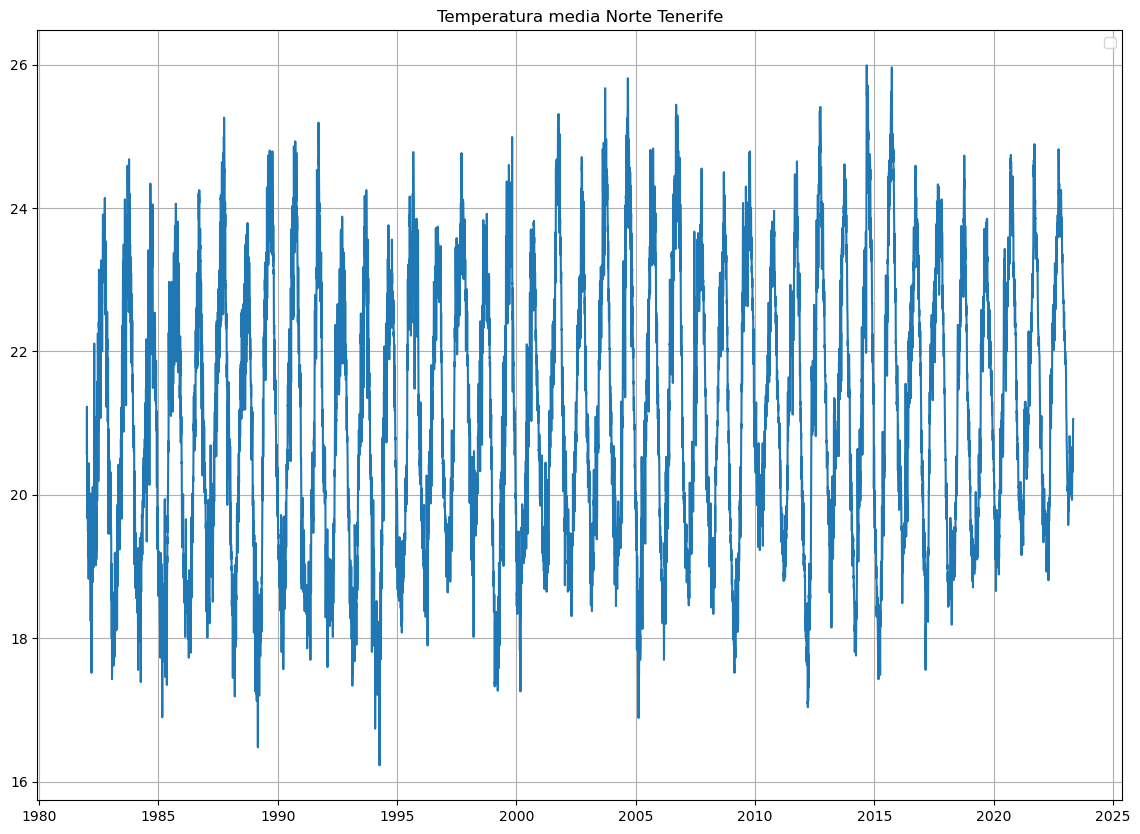

In [20]:
fig, ax = plt.subplots(1, 1 , figsize=(14,10))
ax.plot(sstd_NorteTenerife.time,sstd_NorteTenerife)
ax.grid()
ax.legend()
ax.set_title('Temperatura media Norte Tenerife')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


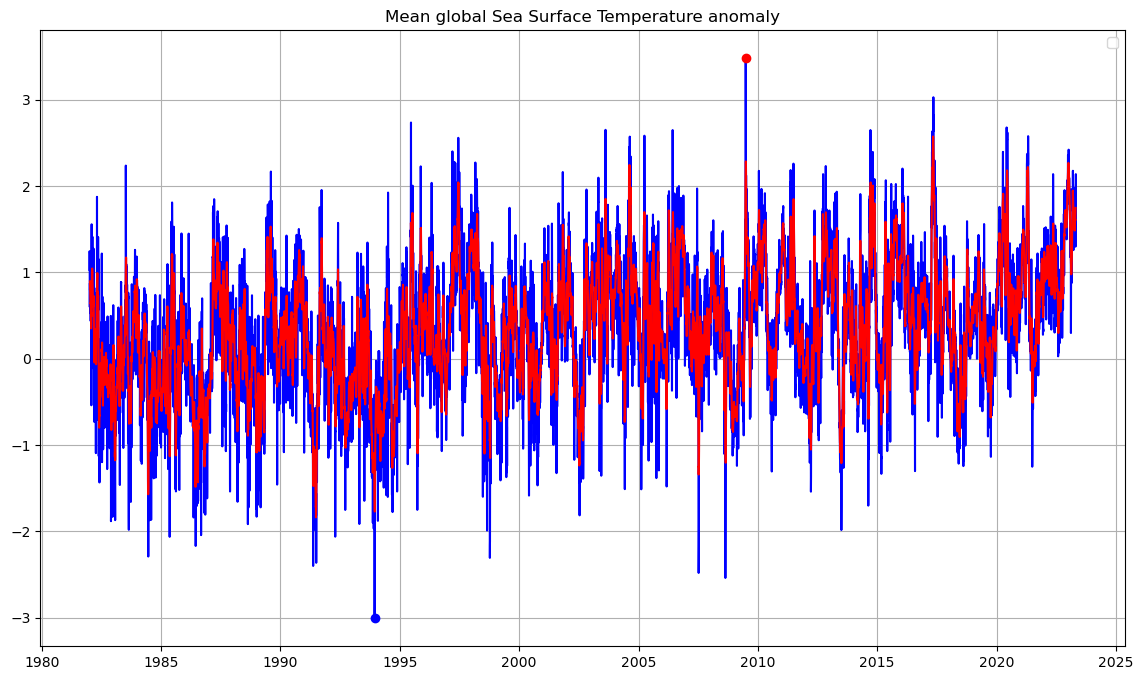

In [21]:
fig, ax = plt.subplots(1, 1 , figsize=(14,8))
ax.plot(sstd_anom_NorteTenerife.time        ,sstd_anom_NorteTenerife,'b')
ax.plot(sstd_anom_NorteTenerife_rolling.time,sstd_anom_NorteTenerife_rolling,'r')
ax.plot(sstd_anom_NorteTenerife.time.isel(sstd_anom_NorteTenerife.argmax(...)),
        sstd_anom_NorteTenerife.isel(sstd_anom_NorteTenerife.argmax(...)),'ro')
ax.plot(sstd_anom_NorteTenerife.time.isel(sstd_anom_NorteTenerife.argmin(...)),
        sstd_anom_NorteTenerife.isel(sstd_anom_NorteTenerife.argmin(...)),'bo')
ax.legend()
ax.grid()
ax.set_title('Mean global Sea Surface Temperature anomaly');